In [1]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_data_list(run_dump):
  if not os.path.exists(run_dump):
    raise IOError('File {0} not found'.format(run_dump))

  data=defaultdict(list)
  header=None
  data_header=None
  with open(run_dump,'r') as fp:
    for line in fp:
      line=line.strip()
      if line.startswith('#'):
        if line.startswith('# Version') or \
           line.startswith('# Column Count') or \
           line.startswith('# Bin Count') or \
           line.startswith('# Channel Count'):
          pass
        else:
          header=line.strip('# ').split(',')[0]
      else:
        if header is not None:
          if 'Lane' in line.split(','):
            data_header=line.split(',')
            continue
          if data_header is not None:
            data[header].append(dict(zip(data_header,line.split(','))))

  return data

In [3]:
%%bash
/home/vmuser/miniconda3/envs/pipeline-env/bin/interop_dumptext \
180809_M03291_0156_000000000-D4K76 > 180809_M03291_0156_000000000-D4K76/dumptext.txt

In [4]:
data=get_data_list(run_dump='180809_M03291_0156_000000000-D4K76/dumptext.txt')

In [5]:
CorrectedInt=pd.DataFrame(data.get('CorrectedInt'))

## Flow cell chart

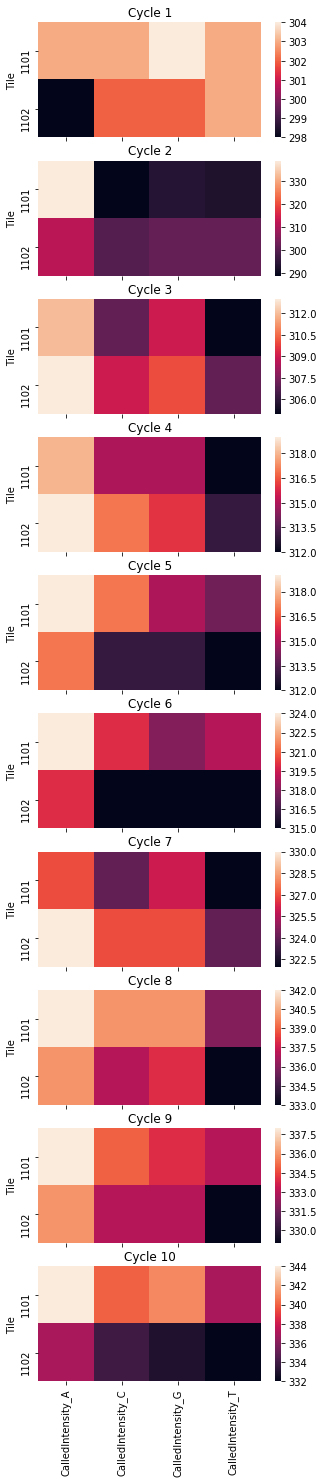

In [6]:
fig,ax=plt.subplots(10,1,figsize=(5,25),sharey=True,sharex=True,)
for cycle in range(1,11):
  c_data=CorrectedInt.\
         groupby('Lane').\
         get_group('1').\
         groupby('Cycle').\
         get_group(str(cycle)).\
         set_index('Tile')\
           [['CalledIntensity_A',
             'CalledIntensity_C',
             'CalledIntensity_G',
             'CalledIntensity_T']].\
         applymap(lambda x: float(x))
  sns.heatmap(c_data,ax=ax[int(cycle)-1])
  ax[int(cycle)-1].set_title('Cycle {0}'.format(cycle))

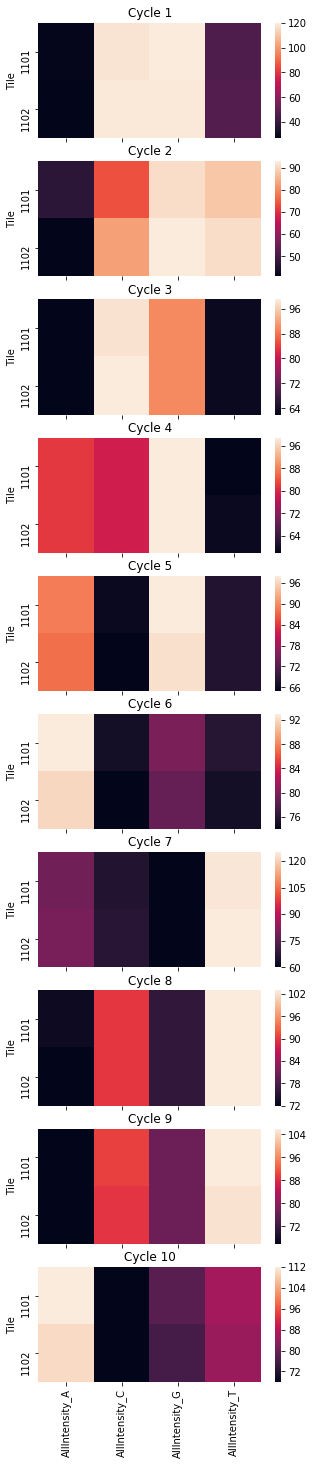

In [7]:
fig,ax=plt.subplots(10,1,figsize=(5,25),sharey=True,sharex=True,)
for cycle in range(1,11):
  c_data=CorrectedInt.\
         groupby('Lane').\
         get_group('1').\
         groupby('Cycle').\
         get_group(str(cycle)).\
         set_index('Tile')\
           [['AllIntensity_A',
             'AllIntensity_C', 
             'AllIntensity_G',
             'AllIntensity_T']].\
         applymap(lambda x: float(x))
  sns.heatmap(c_data,ax=ax[int(cycle)-1])
  ax[int(cycle)-1].set_title('Cycle {0}'.format(cycle))

## Data by cycle

In [8]:
t_data=list()
for cycle, c_data in CorrectedInt.groupby('Lane').get_group('1').groupby('Cycle'):
  t_data.append({'Lane':'1',
                 'Cycle':cycle,
                 'CalledIntensity_A':c_data['CalledIntensity_A'].median(),
                 'CalledIntensity_C':c_data['CalledIntensity_C'].median(),
                 'CalledIntensity_G':c_data['CalledIntensity_G'].median(),
                 'CalledIntensity_T':c_data['CalledIntensity_T'].median()
               })
t_data=pd.DataFrame(t_data)
t_data['Cycle']=t_data['Cycle'].astype(int)
t_data.sort_values('Cycle',inplace=True)

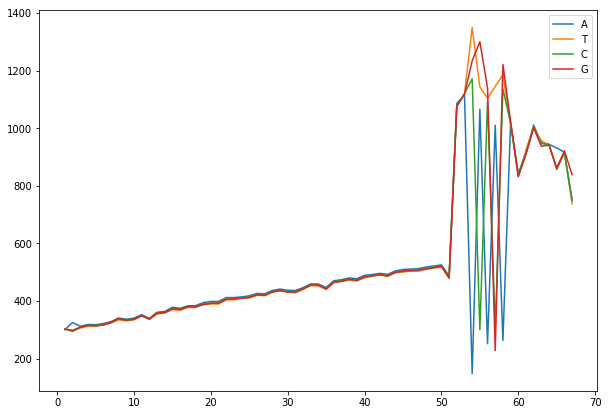

In [9]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(t_data['Cycle'],t_data['CalledIntensity_A'],label='A')
ax.plot(t_data['Cycle'],t_data['CalledIntensity_T'],label='T')
ax.plot(t_data['Cycle'],t_data['CalledIntensity_C'],label='C')
ax.plot(t_data['Cycle'],t_data['CalledIntensity_G'],label='G')
ax.legend();

In [10]:
Tile=pd.DataFrame(data.get('Tile'))

## Data by lane

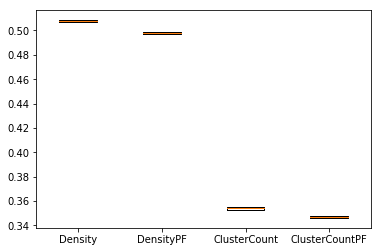

In [11]:
fig,ax=plt.subplots()
t_data=Tile.\
       groupby('Lane').\
       get_group('1')[['Density',
                       'DensityPF',
                       'ClusterCount',
                       'ClusterCountPF']].\
       applymap(lambda x: int(x)/1000000)
ax.boxplot([t_data['Density'],
            t_data['DensityPF'],
            t_data['ClusterCount'],
            t_data['ClusterCountPF']],
            labels=['Density',
                    'DensityPF',
                    'ClusterCount',
                    'ClusterCountPF']);

In [12]:
QByLane=pd.DataFrame(data.get('QByLane'))

## QScore Distribution

In [13]:
t_col=['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6',
       'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10', 'Bin_11', 'Bin_12', 'Bin_13',
       'Bin_14', 'Bin_15', 'Bin_16', 'Bin_17', 'Bin_18', 'Bin_19', 'Bin_20',
       'Bin_21', 'Bin_22', 'Bin_23', 'Bin_24', 'Bin_25', 'Bin_26', 'Bin_27',
       'Bin_28', 'Bin_29', 'Bin_30', 'Bin_31', 'Bin_32', 'Bin_33', 'Bin_34',
       'Bin_35', 'Bin_36', 'Bin_37', 'Bin_38', 'Bin_39', 'Bin_40', 'Bin_41',
       'Bin_42', 'Bin_43', 'Bin_44', 'Bin_45', 'Bin_46', 'Bin_47', 'Bin_48',
       'Bin_49', 'Bin_50']

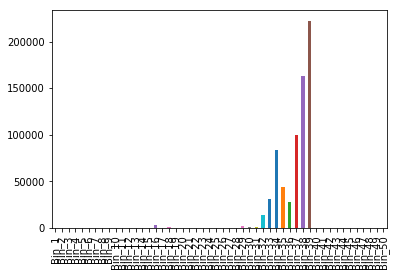

In [14]:
QByLane.\
groupby(['Lane']).\
get_group('1').\
applymap(lambda x: int(x))[t_col].\
mean().T.\
plot(kind='bar');

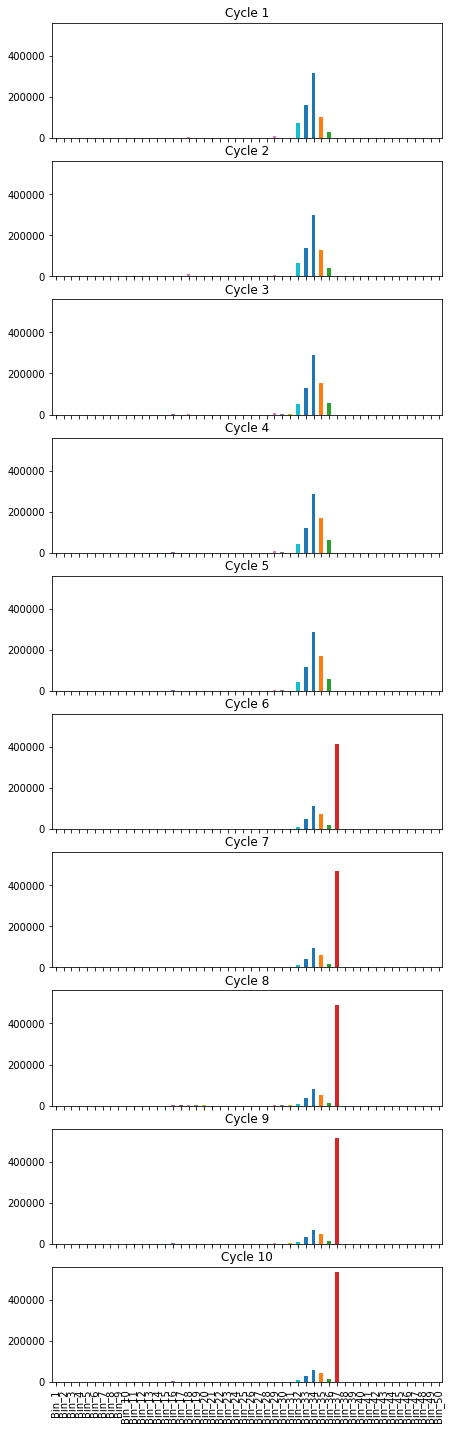

In [15]:
fig,ax=plt.subplots(10,1,figsize=(7,25),sharey=True,sharex=True,)
for cycle in range(1,11):
  QByLane.\
  groupby(['Lane']).\
  get_group('1').\
  groupby(['Cycle']).\
  get_group(str(cycle)).\
  applymap(lambda x: int(x))[t_col].\
  mean().T.\
  plot(kind='bar',ax=ax[int(cycle)-1])
  ax[int(cycle)-1].set_title('Cycle {0}'.format(cycle));

In [16]:
Q2030=pd.DataFrame(data.get('Q2030'))

## QScore Heatmap

In [17]:
tc_data=list()
for cycle, c_data in Q2030.groupby('Lane').\
                     get_group('1').\
                     fillna(0).\
                     applymap(lambda x: int(x)).\
                     sort_values('Cycle').\
                     groupby('Cycle'):
    tc_data.append({'Cycle':cycle,
                    'Q-score':c_data['MedianQScore'].mean()})
tc_data=pd.DataFrame(tc_data)

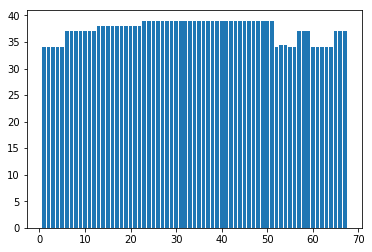

In [18]:
plt.bar(tc_data['Cycle'],tc_data['Q-score']);